In [1]:
import numpy as np
import pysr
import matplotlib.pyplot as plt
import os
import sys
import sympy as sp

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


### Get data

In [2]:
def calculate_interaction(dist, rij, k, epsilon, radii = 1.0):
    """
    Given the vectors ri and rj, compute the force between them
    """


    r = dist

    # Combined radius of both particles (assume unit radii for now)
    #bij = 2.0                       # Ri + Rj 
    bij = radii + radii

    if r < bij*(1 + epsilon):
        force = k*(r - bij)*rij/r  
        print(k*(r - bij))
    elif r < bij*(1 + 2*epsilon):
        force = -k*(r - bij - 2*epsilon*bij)*rij/r
    else:
        force = np.array([0.0, 0.0])
    return force

In [3]:
k = 60
epsilon = 0.5

In [4]:
nb = 20000
dist = np.random.uniform(0, 6, nb)
theta = np.random.uniform(0, 2*np.pi, nb)
#theta = np.ones(nb) * 0
c = np.cos(theta)
s = np.sin(theta)
angle = np.column_stack((c, s))
rij = dist[:, None] * angle

y = []
for i in range(len(dist)):
    y.append(calculate_interaction(dist[i], rij[i, :], k, epsilon, radii = 1.0))

33.19615505052431
-5.888974380839804
5.571152678732023
50.385617673265735
-79.88521641727309
-36.449613369227414
-119.83960658451524
-116.86435276761148
59.20204420374735
-34.673591417579146
-104.0109522900051
7.700280466350975
-47.22382372327687
-80.41022875428399
-58.46107948737361
-12.388309130424187
1.4569431629705498
-5.6701998645616625
-13.286862230858407
20.57312851370371
-116.8692898961103
-17.29172104228543
-2.1578834113284184
16.17234077949351
-111.59110661675041
-108.98055743063588
-34.13711839884297
-17.176993345714642
-71.48974550154388
42.21863681293321
34.49587799012186
36.955520841029134
-65.68163673562333
3.7424951285824015
-72.94249122412093
-106.8540992268182
-79.36412443797921
-12.309584234057942
25.168096308520866
-51.15700454704586
-31.774663476146333
-91.48466811625052
-80.71393651403902
-11.961679550915827
9.026095132591037
-41.11542301891945
47.639840755148455
-115.31530693196305
25.660876878107057
-33.479260068677924
-93.8519688187704
-88.01141202074322
37.769

In [5]:
y2 = np.array(y)

Text(0.5, 0, 'Distance')

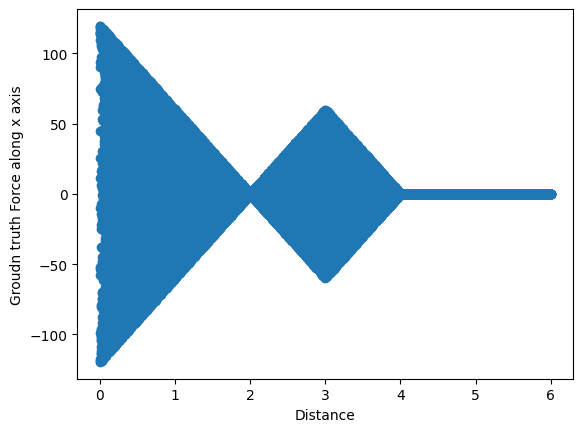

In [6]:
plt.scatter(dist, y2[:, 0])
plt.ylabel('Groudn truth Force along x axis')
plt.xlabel('Distance')

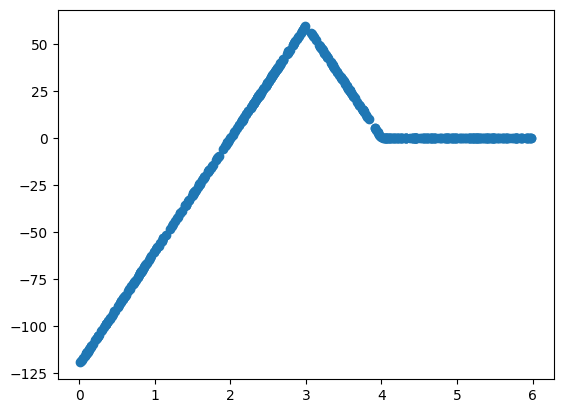

In [10]:
plt.scatter(dist, y2[:, 0] / c)
# :)

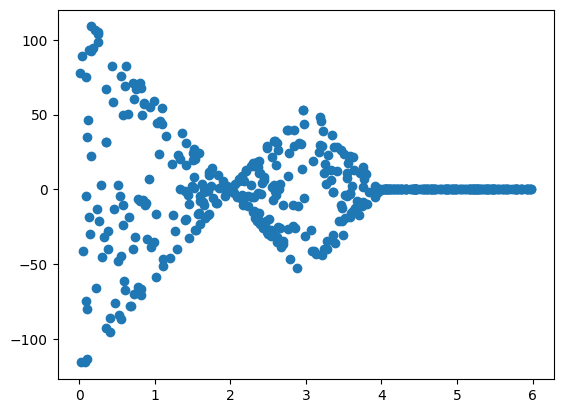

In [11]:
plt.scatter(dist, y2[:, 1])

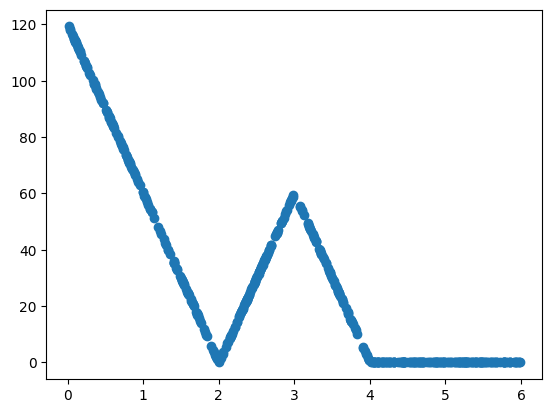

In [12]:
plt.scatter(dist, np.linalg.norm(y2, axis=-1))

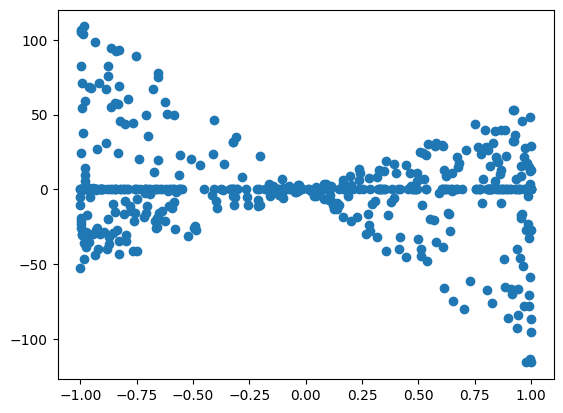

In [13]:
plt.scatter(rij[:, 1]/dist, y2[:, 1])

### finding discontinuities

In [14]:
def detectDiscontinuities(x, y, display = True, nbBins = 50):
    bins = np.linspace(np.min(x), np.max(x), nbBins)
    digit_vals = np.digitize(x, bins)
    print(x.shape)
    print(digit_vals.shape)

    # get the centers

    i = np.arange(len(bins) - 1)
    i2 = i+1
    delta = bins[1] - bins[0]
    print(delta)
    centers = np.array([bins[0] - delta/2] + (bins + delta/2).tolist())

    d = {}
    for i in range(len(centers)):
        d[centers[i]] = []

    for i in range(x.shape[0]):
        d[centers[digit_vals[i]]].append(y[i])

    return d

In [15]:
d = detectDiscontinuities(dist, y2[:, 0])

(500,)
(500,)
0.12181419440529048


In [13]:
stdPlot = []
maxPlot = []
diPlot = []
for k in sorted(d.keys()):
    if len(d[k]) > 0:
        diPlot.append(k)
        stdPlot.append(np.std(d[k]))
        maxPlot.append(np.max(d[k]))


diPlot = np.array(diPlot)
stdPlot = np.array(stdPlot)
maxPlot = np.array(maxPlot)

In [14]:
print(stdPlot)

[78.23296168 78.92172674 76.2184347  74.43321775 69.90265286 66.86282439
 61.65546151 60.04578071 53.90625323 51.01864304 47.19540489 46.1599445
 43.19276944 38.11409909 35.03675693 32.23663139 26.79860817 24.08119268
 21.03237816 16.35810328 14.24129629 10.19231752  6.9761459   3.52481498
  0.9885215   3.15534716  6.70771057  9.70166638 13.62675914 17.79807841
 21.38110776 21.95466659 28.39360385 32.80414816 34.31050665 35.94666103
 40.91834588 36.95461887 34.39202235 31.04429567 26.57581734 24.21008986
 20.43888621 19.52823779 15.08300286 12.30858379  9.02831899  5.79846455
  2.03397582  0.        ]


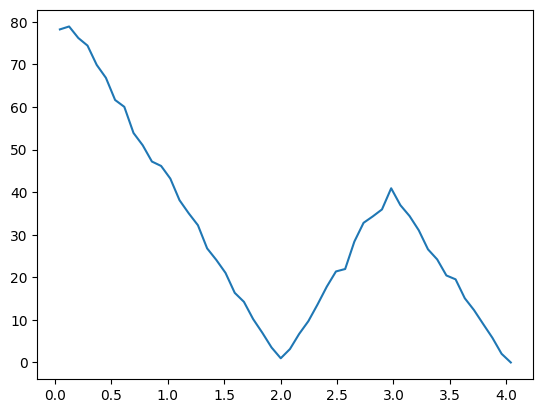

In [15]:
plt.plot(diPlot, stdPlot)

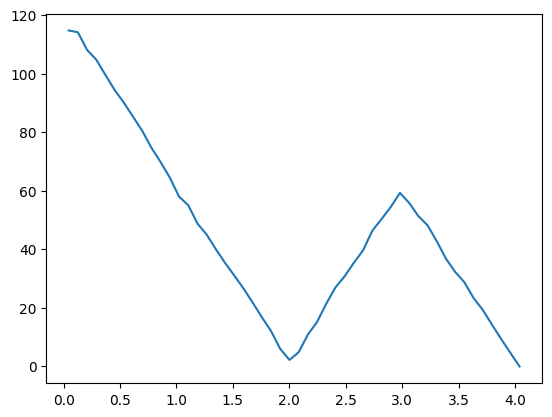

In [16]:
plt.plot(diPlot, maxPlot)

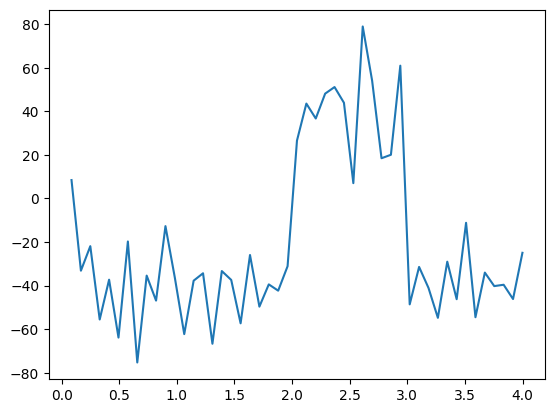

In [17]:
i = np.arange(len(diPlot)-1)
i2 = i + 1
centers = diPlot[i] + (diPlot[i2] - diPlot[i])/2

plt.plot(centers,( (stdPlot[i2] - stdPlot[i]) / (diPlot[i2] - diPlot[i])))

In [18]:
pente = stdPlot

window_size =4
pente_smooth = np.convolve(pente, np.ones(window_size)/window_size, mode='valid')

# Pad the smoothed data to match the length of the original data
pad_width = (len(pente) - len(pente_smooth)) // 2
pente_smooth2 = np.pad(pente_smooth, (pad_width, pad_width), 'edge')

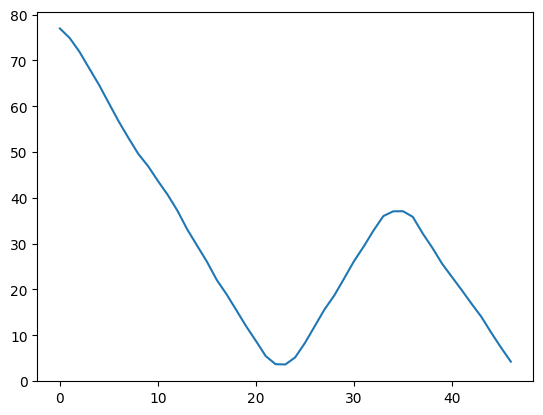

In [19]:
plt.plot(pente_smooth)

[-2.66191476 -0.35850611 -0.62762778 -0.43396975  0.99440246 -0.59211652
 -0.88521366  1.41179205  0.95932159  0.6719807  -2.57362472  0.04143713
  1.57851852 -1.62300409  0.0499108   1.61038977 -1.43061314  0.66572741
  0.40126989 -0.76353689  0.39974781  0.03643605  3.08831443  3.40258013
  0.1131197   0.107675    0.73393554 -0.06251482 -2.40571555  1.76999087
  2.52790786 -3.14927395 -1.64229044  2.68922094 -3.24561618 -4.3974333
  0.9750104  -1.2910511   0.68928744  0.28347928  0.90797171 -0.39572632
 -1.19554034  0.8730567  -0.32719374 -0.34891766  2.13444812 -1.01927539]


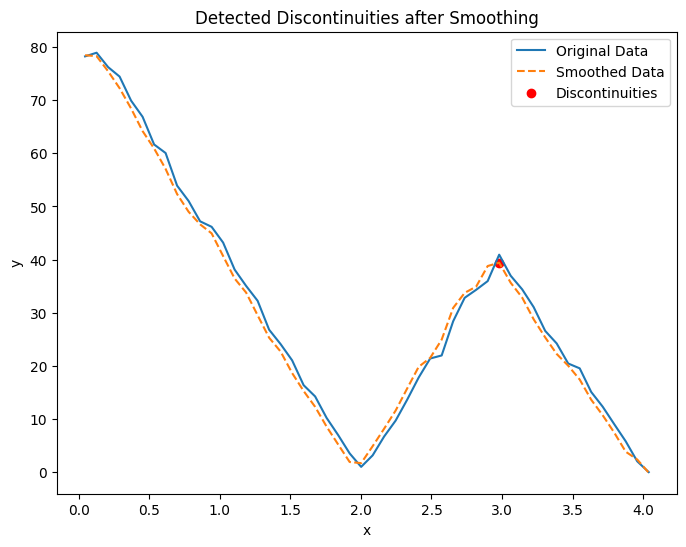

Discontinuity at index 36: x = 2.9800853362195507


In [20]:
from scipy.signal import savgol_filter

pente = stdPlot
centers = diPlot


y_smooth = savgol_filter(pente, window_length=4, polyorder=2)

# Calculate differences between consecutive smoothed y values
dy_smooth = np.diff(np.diff(y_smooth))
print(dy_smooth)
# Define a threshold to detect large discontinuities
threshold = 4  # Adjust this value based on your data

# Identify indices where the absolute difference exceeds the threshold
discontinuities = np.where(np.abs(dy_smooth) > threshold)[0]

# Plot the data, smoothed data, and mark the discontinuities
plt.figure(figsize=(8, 6))
plt.plot(centers, pente, label='Original Data')
plt.plot(centers, y_smooth, label='Smoothed Data', linestyle='--')
plt.scatter(diPlot[discontinuities + 1], y_smooth[discontinuities + 1], color='red', label='Discontinuities')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Detected Discontinuities after Smoothing')
plt.show()

for idx in discontinuities:
    print(f"Discontinuity at index {idx + 1}: x = {centers[idx + 1]}")

### Checking pySr abilities

In [16]:
noise = np.random.normal(0, 1, size = y2.shape)
y3 = y2 + noise

In [17]:
from pysr import PySRRegressor

NB_RUN = 1000
BINARY_OP = ["+", "*", "cond"]
#BINARY_OP_2 = ["+", "*", "/", "cond1(x::T, y::T) where {T} = x >= "]
UNARY_OP = ["inv(x) = 1/x"]
VARIABLES = ['v_x_0', 'v_y_0', 'v_x_1', 'v_y_1', 'v_x_2', 'v_y_2', 'v_x_3', 'v_y_3', 'd', 'delta_x', 'delta_y', 'r_i', 'r_j']
MAX_SIZE = 35
PARSIMONY = 0.00032

def getPySrModel(nbRun = NB_RUN, binaryOp = BINARY_OP, unaryOp = UNARY_OP, maxsize = MAX_SIZE):

    model = PySRRegressor(
        niterations=nbRun,
        binary_operators=binaryOp,
        unary_operators= ["inv(x) = 1/x",],
        #populations=15,
        model_selection = "best",
        maxsize = maxsize,
        #complexity_of_variables = 2,
        parsimony = PARSIMONY,
        nested_constraints = {"cond": {"*":0}},
        adaptive_parsimony_scaling = 1000,
        ncycles_per_iteration = 1000,
        turbo = True,
        extra_sympy_mappings = {"inv": lambda x: 1 / x}
    )

    return model


def fittingModel(model, X, y, verbose:bool = False, variables = VARIABLES):

    if verbose:
        print(">>>>> Fitting pySr")


    # Fit model
    model.fit(X, y, 
    variable_names = variables,
    # X_units = [""],
    # y_units = "",
    )


    return model

In [18]:
pyReg = getPySrModel()

In [19]:
x = np.column_stack((dist, c, s))

In [20]:
print(x.shape)

(500, 3)


In [21]:
print(y2.shape)

(500, 2)


In [22]:
mod = fittingModel(pyReg, x, y2, variables=['r', 'cosine', 'sine'])

/usr/local/lib/python3.11/site-packages/pysr/sr.py:1307: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Compiling Julia backend...


[ Info: Started!



Expressions evaluated per second: 1.270e+05
Head worker occupation: 11.0%
Progress: 143 / 30000 total iterations (0.477%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
2           1.017e+03  7.971e+00  y₀ = inv(r)
3           9.931e+02  2.342e-02  y₀ = -9.2525 * cosine
6           8.358e+02  5.746e-02  y₀ = inv(-0.19916 * r) * cosine
8           8.317e+02  2.465e-03  y₀ = (cosine * inv(inv(-4.3963))) * inv(r)
10          6.055e+02  1.587e-01  y₀ = 15.734 * ((r + (-2.7788 + inv(-1.0222))) * cosine)
11          6.034e+02  3.419e-03  y₀ = (cosine * (cosine + (-5.62 * (-3.5361 + r)))) * -2.9098
14          5.618e+02  2.387e-02  y₀ = (((1.3662 * cosine) * (inv(r) + 13.591)) * 0.73584) * (-3...
                                  .2103 + r)
23          3.281e+02  5.976e-02  y₀ = (((cosine * (1.6376 * ((1.3527 + 1.1344) * cond((inv(r) +...
                  

In [25]:
mod.sympy()[0]

cosine*(r - 6.2476597)*((2*r - 3.66956)*(Piecewise((r, r - 3.4777725 > 0), (0.0, True)) - 5.307554) + 0.8191199)

In [24]:
i = 15
a = mod.equations_
a[0]['sympy_format'][i]


cosine*(r - 6.825589)*(2*r - 3.860869)*(Piecewise((r, 1/(r - 3.7458735 + 1/r) > 0), (0.0, True)) - 4.9960866) - 0.113136895

In [108]:
print(5.3304896 / 1.3507116)

3.9464306073924296


In [90]:
print(a[0])

    complexity        loss     score  \
0            1  970.679570  0.000000   
1            3  933.010500  0.019790   
2            5  845.667200  0.049145   
3            7  464.899900  0.299152   
4            9  241.739240  0.326981   
5           11  241.641000  0.000203   
6           13   39.287130  0.908278   
7           15   36.133015  0.041845   
8           17   34.309410  0.025894   
9           19   29.340448  0.078226   
10          21   27.959959  0.024097   
11          23    8.384119  0.602217   
12          25    8.383672  0.000027   
13          27    7.697316  0.042707   
14          29    7.525429  0.011292   
15          31    7.481025  0.002959   
16          33    7.426435  0.003662   
17          35    7.291048  0.009199   
18          37    7.224667  0.004573   
19          39    7.163472  0.004253   

                                             equation  \
0                                          0.60022134   
1                                 cosine / -0

In [87]:
print(a[0]['sympy_format'])

0                                     0.600221340000000
1                              -8.72092009195338*cosine
2                                   -2.3760016*cosine/r
3                    -36.421513*cosine/(r + 0.20262048)
4     cosine*(Piecewise((87.83511, r - 1.4662161 > 0...
5     cosine*(cosine + Piecewise((87.96837, r - 1.46...
6     Piecewise((cosine*(55.932236*r - 115.431435), ...
7     cosine*(Piecewise((55.932236*r - 116.86465, 2....
8     Piecewise((cosine*(r*(63.243904 - 2.8174806*r)...
9     2.5212908*Piecewise((cosine*(r*(32.441177 - 3....
10    cosine + 2.5212908*Piecewise((cosine*(r*(32.44...
11    Piecewise((cosine*(r*(-9.407699*r**2 + 40.6124...
12    Piecewise((cosine*(r*(-9.407699*r**2 + 40.6124...
13    Piecewise((cosine*(r*(-9.407699*r*Piecewise((r...
14    Piecewise((cosine*(1.00958285954451*r*(-9.4076...
15    Piecewise((cosine*(1.01647097510733*r*(-9.4076...
16    Piecewise((cosine*(r*(r*(0.9310226 - 9.724233*...
17    Piecewise((cosine*(r*(r*(0.92763007 - 9.72

In [92]:
mod.model_selection = 'best'
mod.sympy()

[Piecewise((cosine*(r*(-9.407699*r**2 + 40.6124*r + 14.135321265568) - 109.56316), 1.3348882*r - 5.270916 < 0), (0.0, True)),
 sine*(r - 2.0193589)/(0.017015567*r**2*Piecewise((r - 2.6589906, r - 2.6589906 > 0), (0.0, True))/(r/(r - 3.01353208) - 2.8021624) + 0.017015567) + 0.017015567]

In [46]:
import sympy as sp

theta, r = sp.symbols('theta r')

cosine = sp.cos(theta)
sine = sp.sin(theta)

res = mod.sympy()
sp.pretty_print((res[0]), use_unicode=True)
#sp.pretty_print((a[1]), use_unicode=True)

     2.3167534⋅cosine     ⎛⎧60.992786⋅cosine⋅(r - 2.008096)  for 1.30757⋅r - 4
- ───────────────────── + ⎜⎨                                                  
  4.3653536 - 1.30757⋅r   ⎝⎩              0.0                          otherwi

.3653536 < 0⎞
            ⎟
se          ⎠


In [26]:
print(a[0])

cosine - 0.7432641*cosine*(2*sine + 4.3653536)/(4.3653536 - 1.30757*r) + Piecewise((cosine*r + 60.0123534976068*cosine*(r - 2.0132463), 1.30757*r - 4.3653536 < 0), (0.0, True)) + 0.32732132


In [39]:
a = mod.equations_

In [64]:
a[0]['sympy_format'][17]

cosine - 0.7432641*cosine*(2*sine + 4.3653536)/(4.3653536 - 1.30757*r) + Piecewise((60.0123534976068*cosine*(r - 2.0132463) + cosine, 1.30757*r - 4.3653536 < 0), (0.0, True))

In [59]:
#print(a[0]['complexity'])
print(a[0]['equation'][6])

cond(4.3653536 + (-1.30757 * r), 58.085743 * (cosine * (r + -2.0330174)))


In [15]:
y_pySr = mod.predict(x)

In [16]:
print(x.shape)
print(y_pySr.shape)

(300, 3)
(300, 2)


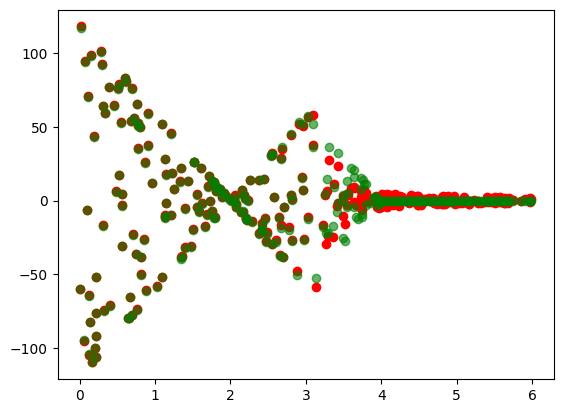

In [17]:
plt.scatter(x[:, 0], y_pySr[:, 0], color = 'red')
plt.scatter(x[:, 0], y2[:, 0], color = 'green', alpha = 0.6)

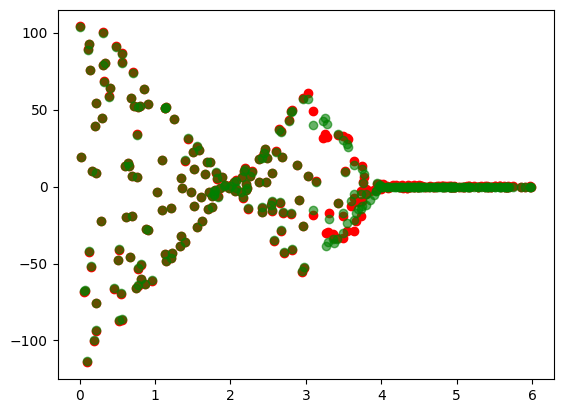

In [18]:
plt.scatter(x[:, 0], y_pySr[:, 1], color = 'red')
plt.scatter(x[:, 0], y2[:, 1], color = 'green', alpha = 0.6)